<a href="https://colab.research.google.com/github/Ishita1013/Ishita/blob/main/ai_planet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train=pd.read_csv('/content/Train_Data.csv')
test=pd.read_csv('/content/Test_Data.csv')

In [ ]:
train.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [ ]:
train.shape

(1966, 9)

In [ ]:
test.shape

(312, 8)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIAGENDR   1948 non-null   float64
 2   PAQ605     1953 non-null   float64
 3   BMXBMI     1948 non-null   float64
 4   LBXGLU     1953 non-null   float64
 5   DIQ010     1948 non-null   float64
 6   LBXGLT     1955 non-null   float64
 7   LBXIN      1957 non-null   float64
 8   age_group  1952 non-null   object 
dtypes: float64(8), object(1)
memory usage: 138.4+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      310 non-null    float64
 1   RIAGENDR  310 non-null    float64
 2   PAQ605    311 non-null    float64
 3   BMXBMI    311 non-null    float64
 4   LBXGLU    311 non-null    float64
 5   DIQ010    311 non-null    float64
 6   LBXGLT    310 non-null    float64
 7   LBXIN     311 non-null    float64
dtypes: float64(8)
memory usage: 19.6 KB


In [ ]:
train.describe()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,1954.000000,1948.000000,1953.000000,1948.000000,1953.000000,1948.000000,1955.000000,1957.000000
mean,78683.621801,1.510267,1.825397,27.965400,99.491039,2.015914,115.150384,11.862892
std,2924.115709,0.500023,0.399449,7.327616,16.774665,0.187579,46.271615,9.756713
min,73564.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76194.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.800000
50%,78717.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.030000
75%,81217.000000,2.000000,2.000000,31.300000,104.000000,2.000000,131.000000,14.480000
max,83727.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [ ]:
# Numerical features only
numeric_cols = train.select_dtypes(include='number').columns

# Skewness values
skewness = train[numeric_cols].skew().sort_values(ascending=False)
print(skewness)

LBXGLU      6.479067
LBXIN       2.706547
LBXGLT      2.696625
DIQ010      2.159471
BMXBMI      1.355254
SEQN       -0.022871
RIAGENDR   -0.041108
PAQ605     -0.381850
dtype: float64


In [ ]:
train.isnull().sum().sort_values(ascending=False)

,0
RIAGENDR,18
DIQ010,18
BMXBMI,18
age_group,14
LBXGLU,13
PAQ605,13
SEQN,12
LBXGLT,11
LBXIN,9


In [ ]:
# Convert 'Adult' to 0 and 'Senior' to 1
train['age_group'] = train['age_group'].map({'Adult': 0, 'Senior': 1})

# Confirm the mapping worked
print(train['age_group'].unique())

[ 0.  1. nan]


In [ ]:
# 1. Drop rows in training set where target variable is missing
train = train.dropna(subset=['age_group'])

# 2. Impute missing values using median for numeric columns
from sklearn.impute import SimpleImputer

# Select numeric columns
numeric_cols = train.columns.drop(['age_group'])

# Instantiate imputer
imputer = SimpleImputer(strategy='median')

# Fit on training data, transform both train and test
train[numeric_cols] = imputer.fit_transform(train[numeric_cols])
test[numeric_cols] = imputer.transform(test[numeric_cols])

In [ ]:
train.isnull().sum().head()

,0
SEQN,0
RIAGENDR,0
PAQ605,0
BMXBMI,0
LBXGLU,0


In [ ]:
train.corr()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
SEQN,1.000000,-0.003626,-0.021463,-0.069711,-0.039078,0.020736,-0.007276,-0.045399,0.021955
RIAGENDR,-0.003626,1.000000,0.151043,0.059637,-0.144480,-0.024328,0.017261,-0.024206,-0.000958
PAQ605,-0.021463,0.151043,1.000000,-0.045392,-0.007634,0.015180,0.061355,0.014294,0.092349
BMXBMI,-0.069711,0.059637,-0.045392,1.000000,0.212751,0.054711,0.180519,0.543977,-0.011133
LBXGLU,-0.039078,-0.144480,-0.007634,0.212751,1.000000,-0.052920,0.666301,0.231774,0.127466
DIQ010,0.020736,-0.024328,0.015180,0.054711,-0.052920,1.000000,-0.015292,0.071088,0.023794
LBXGLT,-0.007276,0.017261,0.061355,0.180519,0.666301,-0.015292,1.000000,0.218977,0.249689
LBXIN,-0.045399,-0.024206,0.014294,0.543977,0.231774,0.071088,0.218977,1.000000,-0.065286
age_group,0.021955,-0.000958,0.092349,-0.011133,0.127466,0.023794,0.249689,-0.065286,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train['age_group'].value_counts()

,count
age_group,
0.0,1638
1.0,314


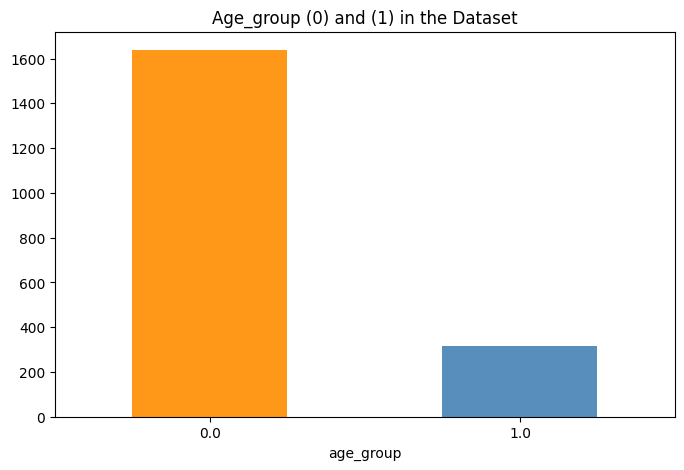

In [ ]:
# Checking the nature of data set: balanced or imbalanced?
fig = plt.figure(figsize = (8,5))
train.age_group.value_counts(normalize = False).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Age_group (0) and (1) in the Dataset')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Features to scale (exclude SEQN if it's just an ID)
features_to_scale = ['RIAGENDR', 'PAQ605', 'BMXBMI',
                     'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']

scaler = StandardScaler()

# Scale train and test features
train[features_to_scale] = scaler.fit_transform(train[features_to_scale])
test[features_to_scale] = scaler.transform(test[features_to_scale])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Set features and target
X = train[features_to_scale]
y = train['age_group']
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model definitions
models = {
    'Logistic Regression': LogisticRegression(C=0.00001, class_weight='balanced', solver='saga', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, scale_pos_weight=(y == 0).sum() / (y == 1).sum(),
                              eval_metric='logloss', random_state=42)
}

# Store results
results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=skf, scoring='f1')
    results[name] = (scores.mean(), scores.std())
    print(f"{name}: Mean F1 Score = {scores.mean():.4f} ± {scores.std():.4f}")

# Find best model
best_model = max(results, key=lambda k: results[k][0])
print(f"\n✅ Best Model: {best_model} with F1 Score = {results[best_model][0]:.4f}")

Logistic Regression: Mean F1 Score = 0.4256 ± 0.0676
Random Forest: Mean F1 Score = 0.2122 ± 0.0412
XGBoost: Mean F1 Score = 0.3165 ± 0.0221

✅ Best Model: Logistic Regression with F1 Score = 0.4256


In [ ]:
# Final Training and Prediction
final_model = models[best_model]
final_model.fit(X, y)
test_preds = final_model.predict(test[features_to_scale])

# Create submission file
submission = pd.DataFrame({'age_group': test_preds})
submission.to_csv('submission.csv', index=False)

print("Submission file for best model created: submission.csv")

Submission file for best model created: submission.csv
